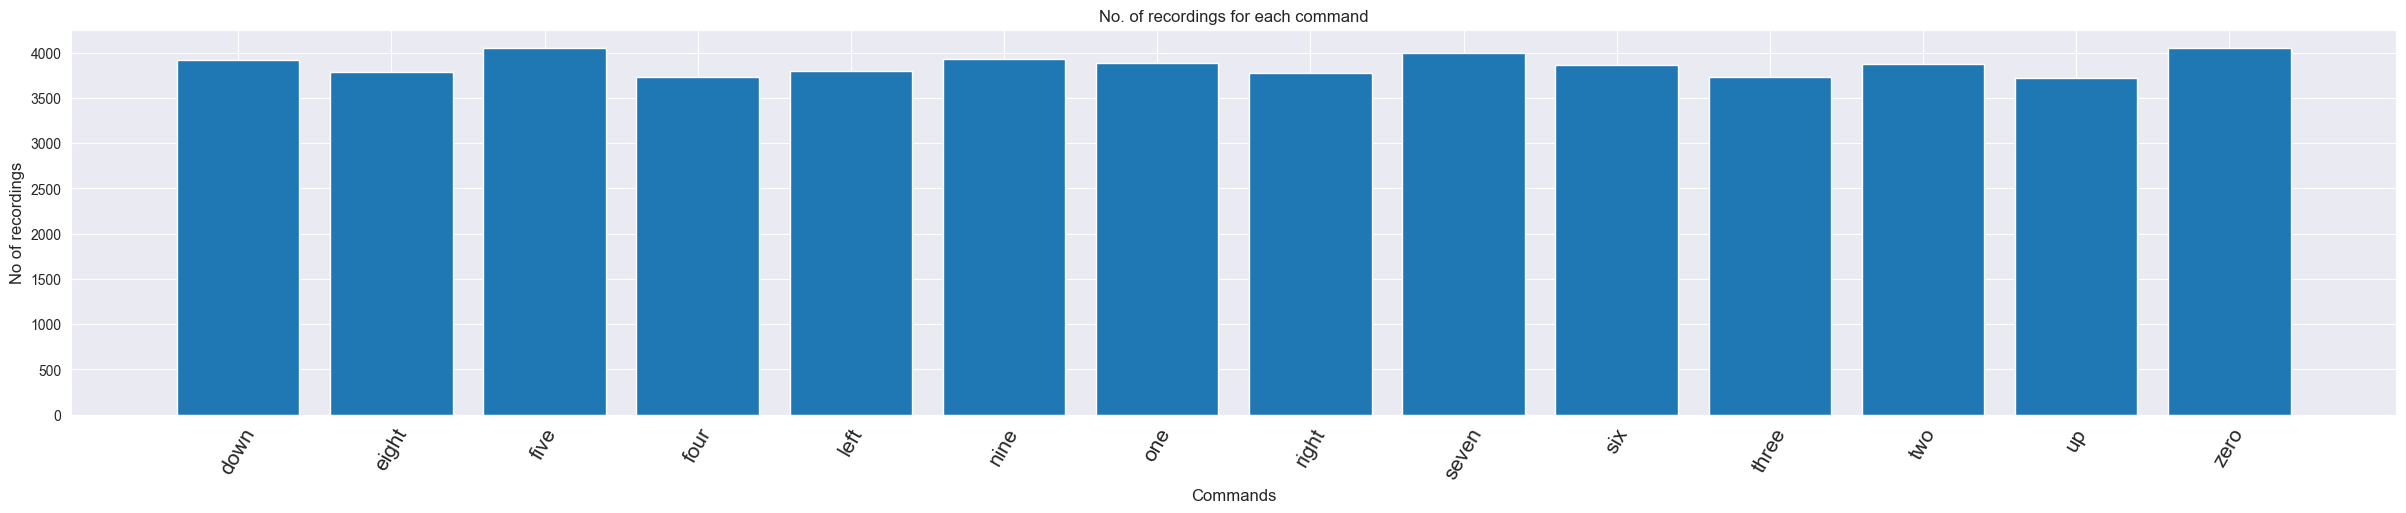

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as ms

train_audio_path = "./data"
labels = os.listdir(train_audio_path)

#find count of each label and plot bar graph
no_of_recordings=[]
for label in labels:
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    no_of_recordings.append(len(waves))
    
#plot
plt.figure(figsize=(30,5))
index = np.arange(len(labels))
plt.bar(index, no_of_recordings)
plt.xlabel('Commands', fontsize=12)
plt.ylabel('No of recordings', fontsize=12)
plt.xticks(index, labels, fontsize=15, rotation=60)
plt.title('No. of recordings for each command')
plt.show()

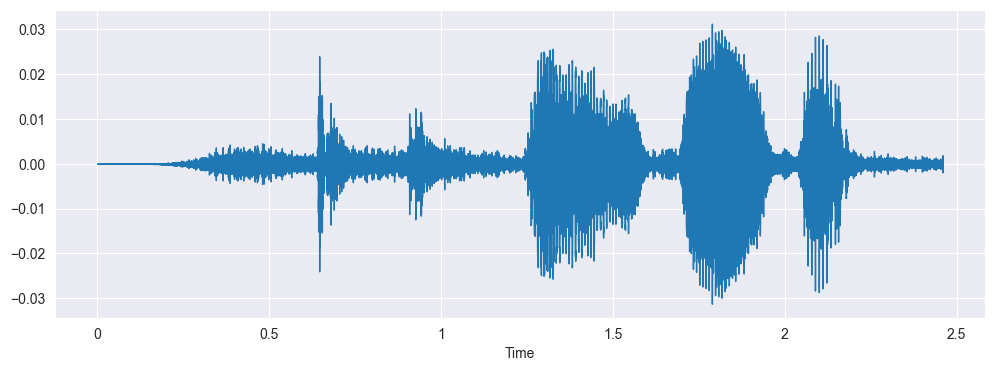

In [2]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
data, sampling_rate = librosa.load('0a2b400e_nohash_0.wav')
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,sr=sampling_rate)

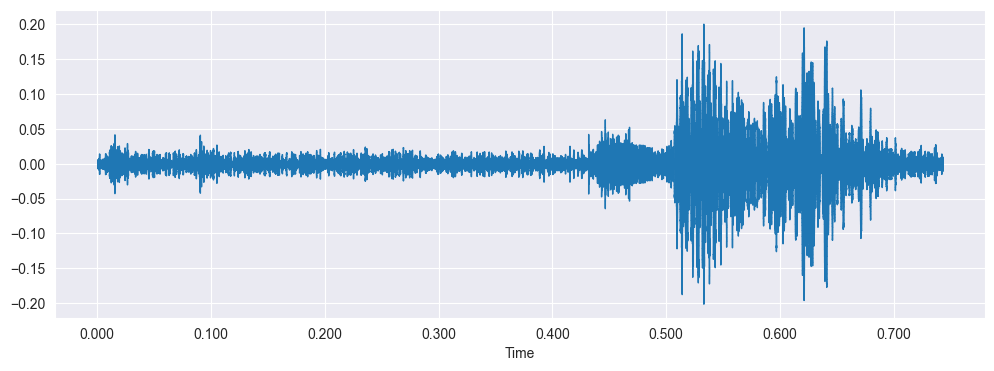

In [8]:
data, sampling_rate = librosa.load('data/two/0a5636ca_nohash_0.wav')
plt.figure(figsize=(12,4))
librosa.display.waveshow(data,sr=sampling_rate)

In [5]:
all_wave = []
all_label = []

for label in labels:
    print(label)
    waves = [f for f in os.listdir(train_audio_path + '/'+ label) if f.endswith('.wav')]
    for wav in waves:
        samples, sample_rate = librosa.load(train_audio_path + '/' + label + '/' + wav, sr = 8000)
        #samples = librosa.resample(samples, sample_rate, 8000)
        if(len(samples) == 8000) : 
            all_wave.append(samples)
            all_label.append(label)

down
eight
five
four
left
nine
one
right
seven
six
three
two
up
zero


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y=le.fit_transform(all_label)
classes= list(le.classes_)
classes

['down',
 'eight',
 'five',
 'four',
 'left',
 'nine',
 'one',
 'right',
 'seven',
 'six',
 'three',
 'two',
 'up',
 'zero']

In [7]:
from keras.utils import to_categorical
y=to_categorical(y, num_classes=len(labels))
all_wave = np.array(all_wave).reshape(-1,8000)
all_wave.shape

(49427, 8000)

In [8]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(np.array(all_wave),np.array(y),stratify=y,test_size = 0.2,random_state=777,shuffle=True)
x_te, x_val, y_te, y_val = train_test_split(x_val,y_val,stratify=y_val,test_size = 0.5,random_state=777,shuffle=True)

In [9]:
from keras.layers import Dense, Dropout, Flatten, Conv1D, Input, MaxPooling1D, LSTM, TimeDistributed
from keras.models import Model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
K.clear_session()

inputs = Input(shape=(8000,1))

#First Conv1D layer
conv = Conv1D(8,13, padding='valid', activation='relu', strides=1)(inputs)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Second Conv1D layer
conv = Conv1D(16, 11, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

#Third Conv1D layer
conv = Conv1D(32, 9, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)



#Fourth Conv1D layer
conv = Conv1D(64, 7, padding='valid', activation='relu', strides=1)(conv)
conv = MaxPooling1D(3)(conv)
conv = Dropout(0.3)(conv)

conv = LSTM(64, return_sequences=True)(conv)
conv = Dropout(0.3)(conv)
conv = LSTM(64, return_sequences=False)(conv)
conv = Dropout(0.3)(conv)


#Dense Layer 1
conv = Dense(256, activation='relu')(conv)
conv = Dropout(0.3)(conv)

#Dense Layer 2
conv = Dense(128, activation='relu')(conv)
conv = Dropout(0.3)(conv)

outputs = Dense(len(labels), activation='softmax')(conv)

model = Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8000, 1)]         0         
                                                                 
 conv1d (Conv1D)             (None, 7988, 8)           112       
                                                                 
 max_pooling1d (MaxPooling1  (None, 2662, 8)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 2662, 8)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 2652, 16)          1424      
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 884, 16)           0         
 g1D)                                                        

In [10]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, min_delta=0.0001) 
history=model.fit(x_tr, y_tr ,epochs=20,callbacks=es,  batch_size=32, validation_data=(x_val,y_val))


Epoch 1/20
1236/1236 [==============================] - 287s 228ms/step - loss: 2.4524 - accuracy: 0.1380 - val_loss: 2.1817 - val_accuracy: 0.2142
Epoch 2/20
1236/1236 [==============================] - 308s 249ms/step - loss: 1.9542 - accuracy: 0.2964 - val_loss: 1.6742 - val_accuracy: 0.4192
Epoch 3/20
1236/1236 [==============================] - 251s 203ms/step - loss: 1.5208 - accuracy: 0.4848 - val_loss: 1.2234 - val_accuracy: 0.5966
Epoch 4/20
1236/1236 [==============================] - 262s 212ms/step - loss: 1.2822 - accuracy: 0.5851 - val_loss: 0.9638 - val_accuracy: 0.6971
Epoch 5/20
1236/1236 [==============================] - 292s 236ms/step - loss: 1.0647 - accuracy: 0.6706 - val_loss: 0.9391 - val_accuracy: 0.6911
Epoch 6/20
1236/1236 [==============================] - 263s 212ms/step - loss: 0.9452 - accuracy: 0.7071 - val_loss: 0.7770 - val_accuracy: 0.7499
Epoch 7/20
1236/1236 [==============================] - 258s 209ms/step - loss: 0.8309 - accuracy: 0.7459 - val_

INFO:tensorflow:Assets written to: checkpoint\model_20230911-104626\assets


INFO:tensorflow:Assets written to: checkpoint\model_20230911-104626\assets


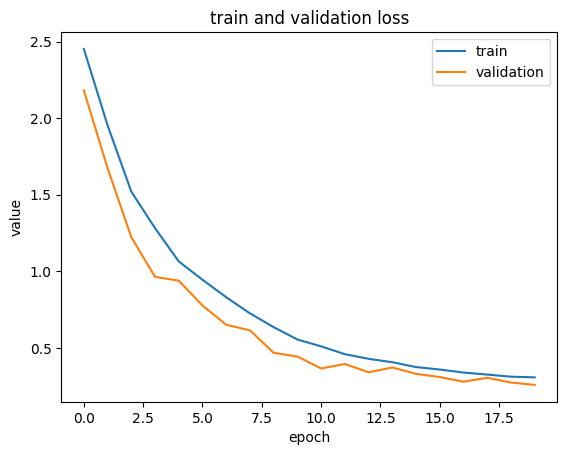

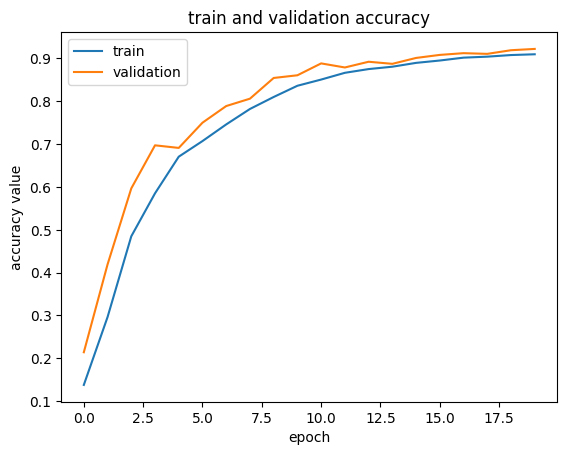

155/155 [==============================] - 13s 77ms/step


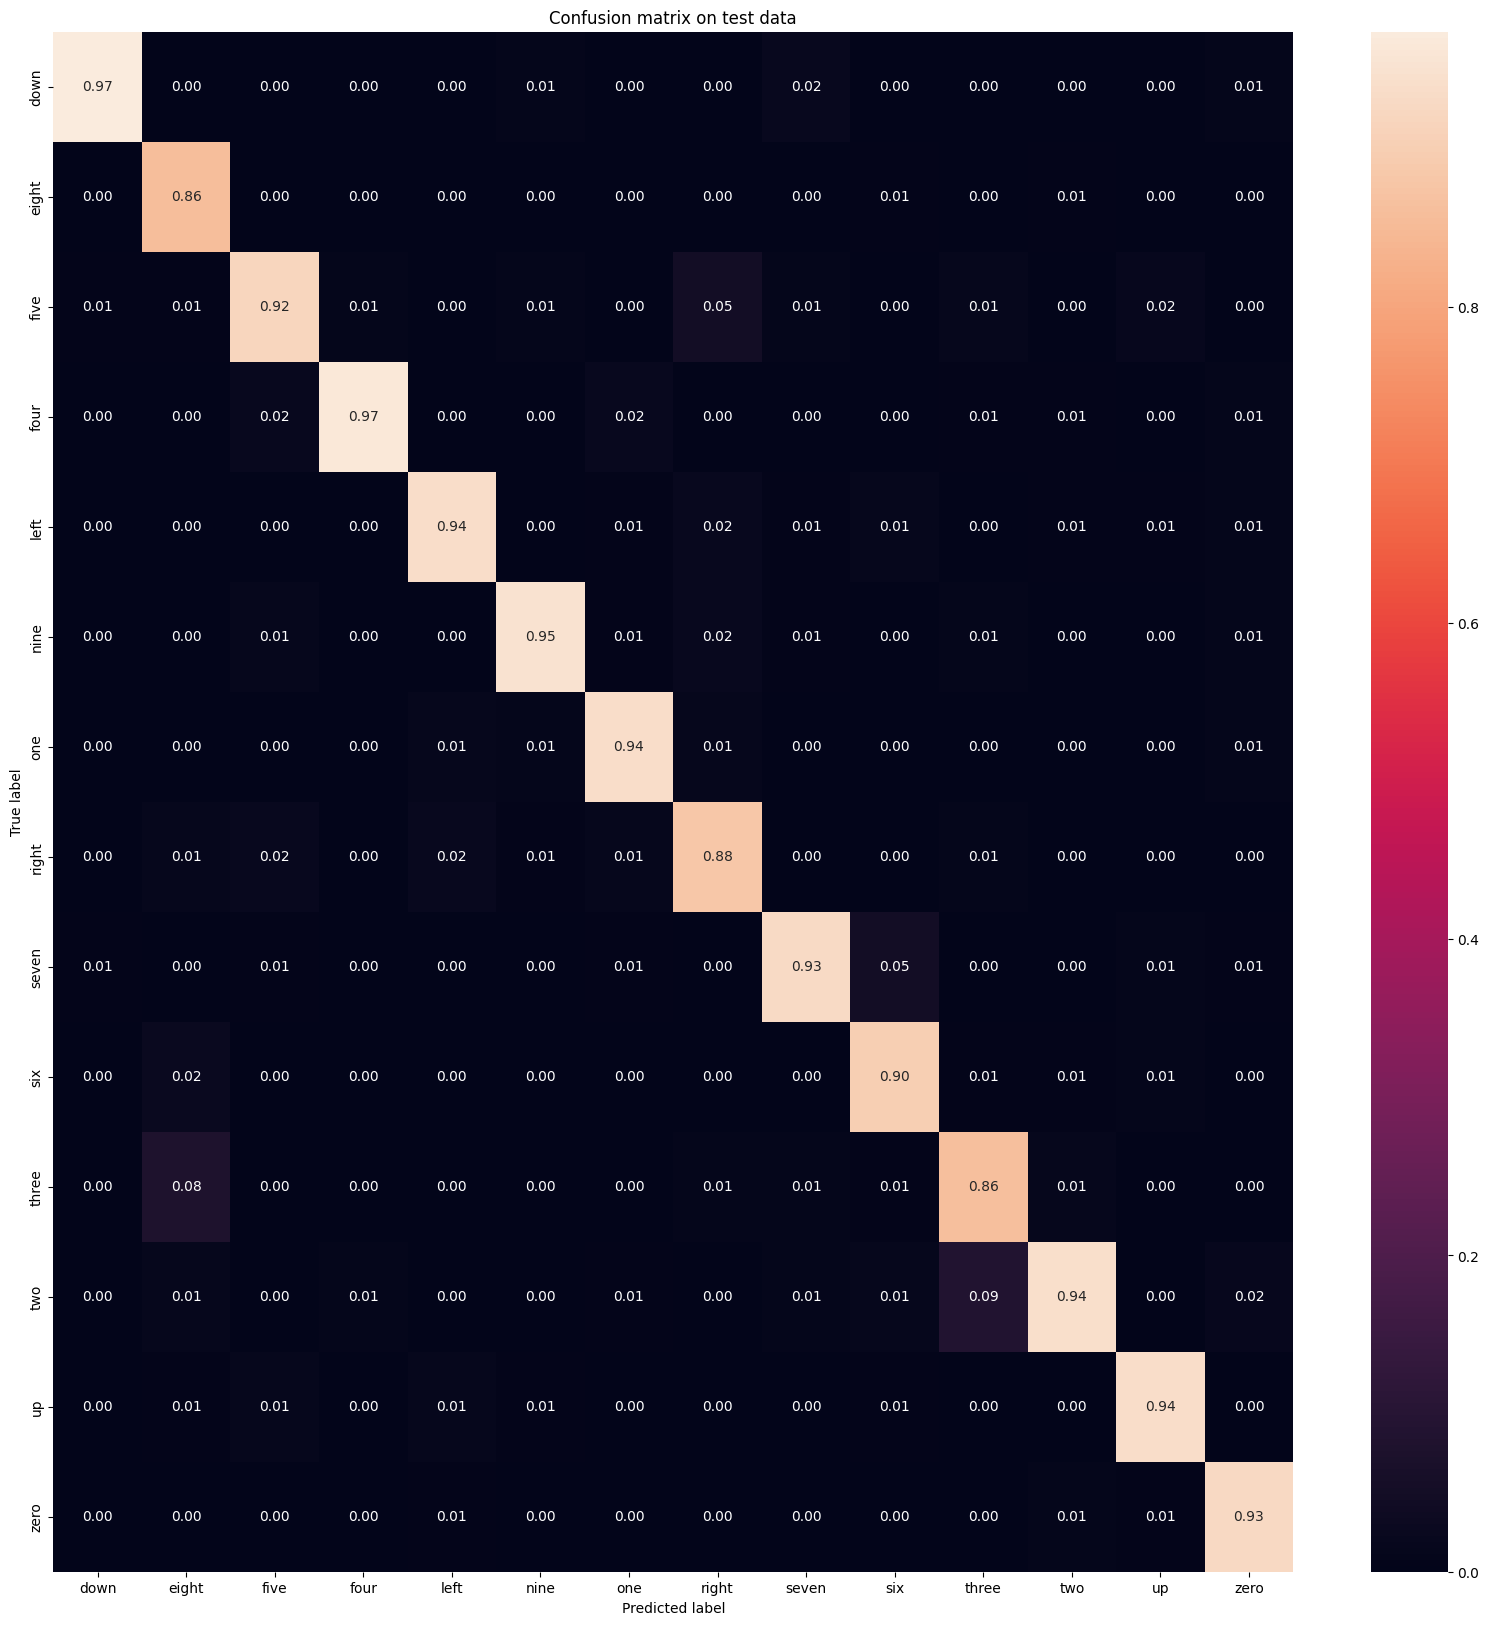

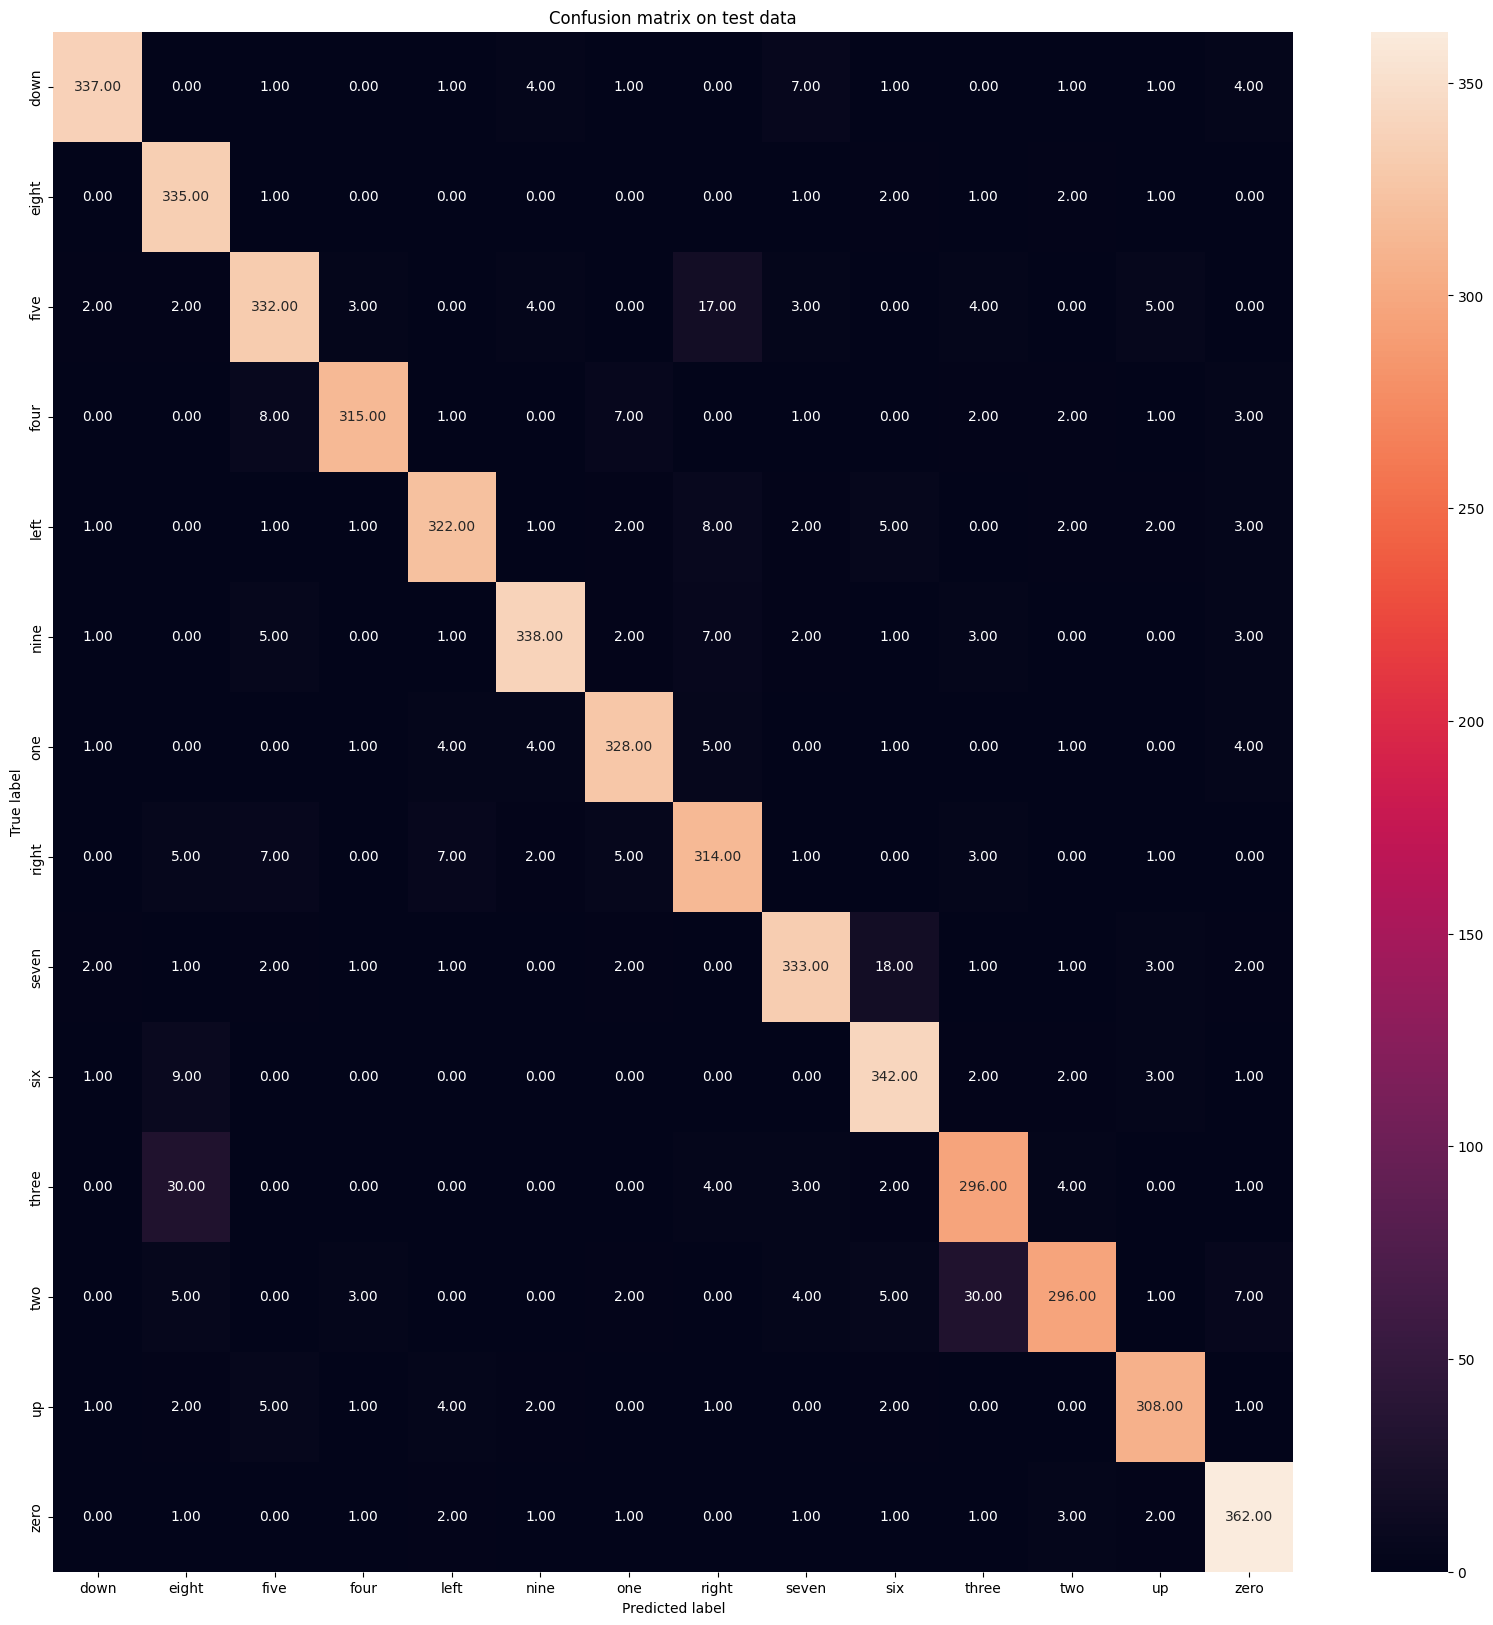

1236/1236 [==============================] - 93s 75ms/step
Accuracy score on train dataset: 0.9344477883715637
155/155 [==============================] - 11s 69ms/step
Accuracy score on validation dataset: 0.922112077685616
Accuracy score on test dataset: 0.922112077685616


In [11]:
import time
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

path = "checkpoint"
datetime = time.strftime("%Y%m%d-%H%M%S")
model.save(os.path.join(path, 'model_' + datetime))

#plotting the loss
history = model.history
pyplot.plot(history.history['loss'])
pyplot.plot(history.history["val_loss"])
pyplot.title("train and validation loss")
pyplot.ylabel("value")
pyplot.xlabel("epoch")
pyplot.legend(['train','validation'])
plt.show()

#plotting the loss
pyplot.plot(history.history['accuracy'])
pyplot.plot(history.history["val_accuracy"])
pyplot.title("train and validation accuracy")
pyplot.ylabel("accuracy value")
pyplot.xlabel("epoch")
pyplot.legend(['train','validation'])
plt.show()

y_prediction = model.predict(x_te)
y_prediction = np.argmax(y_prediction, axis = 1)
y_test_single_column=np.argmax(y_te, axis=1)
result = confusion_matrix(y_test_single_column, y_prediction , normalize='pred')
plt.figure(figsize=(20,20))
labels = classes
sns.heatmap(result, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix on test data')
plt.show()

result = confusion_matrix(y_test_single_column, y_prediction)
plt.figure(figsize=(20,20))
labels = classes
sns.heatmap(result, annot=True, fmt='.2f', xticklabels=labels, yticklabels=labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix on test data')
plt.show()


acc_train = accuracy_score(np.argmax(y_tr, axis=1), np.argmax(model.predict(x_tr), axis = 1))
print(f"Accuracy score on train dataset: {acc_train}")
acc_val = accuracy_score(np.argmax(y_val, axis=1), np.argmax(model.predict(x_val), axis = 1))
print(f"Accuracy score on validation dataset: {acc_val}")
acc_test = accuracy_score(y_test_single_column, y_prediction)
print(f"Accuracy score on test dataset: {acc_test}")